<a href="https://colab.research.google.com/github/brito-bernardo/osmnx/blob/main/CycleLaneWrong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 2.4 MB/s eta 0:00:00


In [17]:
import osmnx as ox
import matplotlib.pyplot as plt
import networkx as nx


In [18]:
ox.config(use_cache=True, log_console=True)


<ipython-input-18-2902d93f5f27>:1: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(use_cache=True, log_console=True)


In [19]:
place_name = "Porto, Portugal"


In [20]:
G = ox.graph_from_place(place_name, network_type = 'all')

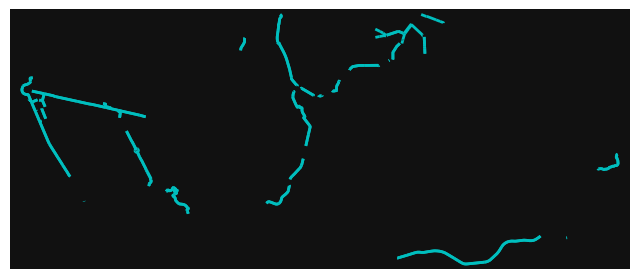

In [23]:
edges = ox.graph_to_gdfs(G, nodes=False, edges=True)

#Filtering all cycling ways

# Define a list of conditions for filtering cycleways
conditions = [
    edges['highway'] == 'cycleway'
]

# Check for the 'cycleway' column and add it to the conditions if it exists
if 'cycleway' in edges.columns:
    conditions.append(edges['cycleway'].notnull())

# Check for the 'bicycle' column and add it to the conditions if it exists
if 'bicycle' in edges.columns:
    conditions.append(edges['bicycle'] == 'designated')

# Combine all conditions
combined_conditions = conditions[0]
for condition in conditions[1:]:
    combined_conditions |= condition

# Filter edges based on the combined conditions
cycleways = edges[combined_conditions]

# Check if we have any cycleways to plot
if not cycleways.empty:
    # Create a subgraph with the cycleways
    G_cycleways = G.edge_subgraph(cycleways.index.tolist())

    # Plot the cycling network
    fig, ax = ox.plot_graph(G_cycleways, node_size=0, edge_color="c", edge_linewidth=2)
    plt.show()
else:
    print("No cycleways were found with the current data.")
